# Final term project

## Team Name
Micky Kumar
<br>
Iram
<br>
Harold

## Import

In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Input, Conv2D, MaxPooling2D,GlobalMaxPooling2D,
Flatten, Dense, GlobalAveragePooling2D, Activation, MaxPool2D, AvgPool2D, Dropout, Conv1D, MaxPooling1D
from keras.models import Model
from keras import applications
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras.utils import to_categorical
from numpy import array
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn import preprocessing
from sklearn.utils import shuffle

##  data preparation 

### Project Overview

Based on the COVID-19 Cases dataset from open data toronto, this project will show detail about covid-19 by the Toronto public health. The details include demographic, geographic, and severity information for all confirmed and likely cases. The images for the X-ray is provided by kaggle. The Kaggle link is below:
https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset/


### Research question and problem framing

Based on this dataset, we are trying to predict the outcome based on age. This will allows people to know what age are getting more affected by COVID-19 and how to support them.

<br>
Who: The stakeholders will for this project will be people are creating a medicine for COVID-19, but also everyone will the community. 
<br>

What: In this problem, we are trying to invesigate about COVID-19 and the affect on it
<br>

When: This problem needs to complete as soon as possible because this is affecting everyone daily life and health.
<br>

Where: The COVID-19 is affecting worldwide and it is a worldwide pandemic.


### Types of features

The dataset that is being used are:
<br>
- _id: This created a unique id for the cases that comes in.
- Outbreak Associated: This talks about where the outbreak is occuring in Toronto.
- Age Group: This feature is about age groups for COVID-19
- Neighbourhood Name: This feature talks about Toronto divided into 140 geographically distinct neighborhoods and can be used to understandwhere most cases are coming from
- FSA: This feature creates a unique code based on client postal code and help understand where thae case is occuring.
- Source of Infection: The feature talks aboutbefore symptoms start are potential acquisition sources. this include travels, close contact with a case, institutional setting, healthcare setting, community, pending, unknown/missing, and N/A.
- Classification:The feaure is about categorize the cases as confirmed according to standard criteria
- Episode Date: The feature talks about the date when the symptom occured.
- Reported Date: The feature talks about date on which the case was reported to Toronto Public Health
- Client Gender: The feature that classifies people based on their assigned biological sex
- Outcome: This feature is include fatal(cases with a fatal outcome reported), resolved (case that is more than 14 days or the patient is recoved), Active (All other cases that is remaining)
- Currently Hospitalized: The feature talks about cases that are currently admitted to hospital
- Currently in ICU: The feature is about cases that are currently admitted to the intensive care unit with no discharge date.
- Currently Intubated: The feature is about cases that were intubated. 
- Ever Hospitalized:The feature is about cases that were hospitalized. 
- Ever in ICU: This feature is the cases that were admitted to the intensive care unit (ICU). 
- Ever Intubated: This feature talks about cases that are currently intubated and that have been discharged.

In the Chest_xray_Corona_Metadata.csv, it contains 6 features and 5910 unique values. While the 
Chest_xray_Corona_dataset_Summary.csv has 5 feature and 7 values.

### Explore

In [78]:
covid19 = pd.read_csv('C:/Users/Micky/Downloads/COVID19-cases.csv')
train_df = pd.read_csv('C:/Users/Micky/Documents/GitHub/DL-final-project/Chest-xray/Chest_xray_Corona_Metadata.csv')
test_img_dir = 'C:/Users/Micky/Documents/GitHub/DL-final-project/Chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
train_img_dir = 'C:/Users/Micky/Documents//GitHub/DL-final-project/Chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'


In [79]:
covid19.shape

(14691, 17)

In [4]:
covid19.head()

_id  Outbreak Associated Age Group Neighbourhood Name  FSA  \
0  14692             Sporadic     50-59            Malvern  M1B   
1  14693             Sporadic     20-29            Malvern  M1B   
2  14694             Sporadic     60-69            Malvern  M1B   
3  14695  Outbreak Associated     50-59              Rouge  M1B   
4  14696             Sporadic     30-39              Rouge  M1B   

         Source of Infection Classification Episode Date Reported Date  \
0              Institutional      CONFIRMED   2020-03-25    2020-03-27   
1                  Community      CONFIRMED   2020-03-20    2020-03-28   
2                     Travel      CONFIRMED   2020-03-04    2020-03-08   
3  N/A - Outbreak associated      CONFIRMED   2020-05-02    2020-05-04   
4              Close contact      CONFIRMED   2020-05-31    2020-06-06   

  Client Gender   Outcome Currently Hospitalized Currently in ICU  \
0          MALE  RESOLVED                     No               No   
1          MALE  RESOLVED                     No               No   
2        FEMALE  RESOLVED                     No               No   
3        FEMALE  RESOLVED                     No               No   
4        FEMALE  RESOLVED                     No               No   

  Currently Intubated Ever Hospitalized Ever in ICU Ever Intubated  
0                  No                No          No             No  
1                  No               Yes          No             No  
2                  No               Yes         Yes            Yes  
3                  No                No          No             No  
4                  No                No          No             No

In [5]:
covid19.tail()

_id  Outbreak Associated Age Group Neighbourhood Name  FSA  \
14686  29378  Outbreak Associated     50-59                NaN  NaN   
14687  29379  Outbreak Associated     50-59                NaN  NaN   
14688  29380  Outbreak Associated     20-29                NaN  NaN   
14689  29381  Outbreak Associated     40-49                NaN  NaN   
14690  29382  Outbreak Associated     50-59                NaN  NaN   

             Source of Infection Classification Episode Date Reported Date  \
14686  N/A - Outbreak associated      CONFIRMED   2020-06-02    2020-06-03   
14687  N/A - Outbreak associated      CONFIRMED   2020-06-11    2020-06-15   
14688  N/A - Outbreak associated      CONFIRMED   2020-05-09    2020-05-23   
14689  N/A - Outbreak associated      CONFIRMED   2020-06-18    2020-06-19   
14690  N/A - Outbreak associated      CONFIRMED   2020-06-22    2020-06-23   

      Client Gender   Outcome Currently Hospitalized Currently in ICU  \
14686        FEMALE  RESOLVED                     No               No   
14687        FEMALE  RESOLVED                     No               No   
14688        FEMALE  RESOLVED                     No               No   
14689        FEMALE  RESOLVED                     No               No   
14690        FEMALE    ACTIVE                    Yes               No   

      Currently Intubated Ever Hospitalized Ever in ICU Ever Intubated  
14686                  No                No          No             No  
14687                  No                No          No             No  
14688                  No                No          No             No  
14689                  No                No          No             No  
14690                  No               Yes          No             No

In [6]:
covid19.describe()

_id
count  14691.000000
mean   22037.000000
std     4241.070737
min    14692.000000
25%    18364.500000
50%    22037.000000
75%    25709.500000
max    29382.000000

In [7]:
covid19.head()

_id  Outbreak Associated Age Group Neighbourhood Name  FSA  \
0  14692             Sporadic     50-59            Malvern  M1B   
1  14693             Sporadic     20-29            Malvern  M1B   
2  14694             Sporadic     60-69            Malvern  M1B   
3  14695  Outbreak Associated     50-59              Rouge  M1B   
4  14696             Sporadic     30-39              Rouge  M1B   

         Source of Infection Classification Episode Date Reported Date  \
0              Institutional      CONFIRMED   2020-03-25    2020-03-27   
1                  Community      CONFIRMED   2020-03-20    2020-03-28   
2                     Travel      CONFIRMED   2020-03-04    2020-03-08   
3  N/A - Outbreak associated      CONFIRMED   2020-05-02    2020-05-04   
4              Close contact      CONFIRMED   2020-05-31    2020-06-06   

  Client Gender   Outcome Currently Hospitalized Currently in ICU  \
0          MALE  RESOLVED                     No               No   
1          MALE  RESOLVED                     No               No   
2        FEMALE  RESOLVED                     No               No   
3        FEMALE  RESOLVED                     No               No   
4        FEMALE  RESOLVED                     No               No   

  Currently Intubated Ever Hospitalized Ever in ICU Ever Intubated  
0                  No                No          No             No  
1                  No               Yes          No             No  
2                  No               Yes         Yes            Yes  
3                  No                No          No             No  
4                  No                No          No             No

In [35]:
train_df.head(5)

Unnamed: 0   X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg  Normal        TRAIN                    NaN   
4           4  IM-0119-0001.jpeg  Normal        TRAIN                    NaN   

  Label_1_Virus_category  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

### Missing Values

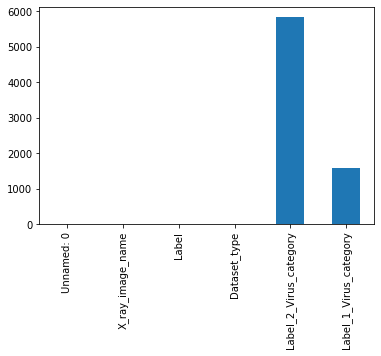

In [36]:
missing_vals = train_df.isnull().sum()
missing_vals.plot(kind = 'bar')

In [37]:
train_df.dropna(how = 'all')
train_df.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [38]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


Unnamed: 0             X_ray_image_name     Label Dataset_type  \
5484        5507    NORMAL2-IM-0079-0001.jpeg    Normal         TEST   
5295        5318            IM-0010-0001.jpeg    Normal         TEST   
5773        5796   person78_bacteria_386.jpeg  Pnemonia         TEST   
5761        5784   person81_bacteria_398.jpeg  Pnemonia         TEST   
5538        5561   person1613_virus_2799.jpeg  Pnemonia         TEST   
5514        5537    NORMAL2-IM-0343-0001.jpeg    Normal         TEST   
5444        5467    NORMAL2-IM-0221-0001.jpeg    Normal         TEST   
5837        5860       person24_virus_58.jpeg  Pnemonia         TEST   
5641        5664  person124_bacteria_589.jpeg  Pnemonia         TEST   
5879        5902   person1668_virus_2882.jpeg  Pnemonia         TEST   

     Label_2_Virus_category Label_1_Virus_category  
5484                    NaN                    NaN  
5295                    NaN                    NaN  
5773                    NaN               bacteria  
5761                    NaN               bacteria  
5538                    NaN                  Virus  
5514                    NaN                    NaN  
5444                    NaN                    NaN  
5837                    NaN                  Virus  
5641                    NaN               bacteria  
5879                    NaN                  Virus

In [ ]:
data_path = 'C:/UOFT/3546_TermProject/covid/DL-final-project/Chest_xray_seperate'
data_dir_list = os.listdir(data_path)
print(data_path)

#### Set Image Size and Epocs

In [ ]:
img_rows=128
img_cols=128
num_channel=3
num_epoch=40

#### Define the number of classes

In [ ]:
num_classes = 2

img_data_list=[]

In [ ]:
def data_preperation():
    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            if ( num_channel == 1):
                input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(128,128))
            img_data_list.append(input_img_resize)

def display_loss_accuracy(hist):
    train_loss=hist.history['loss']
    val_loss=hist.history['val_loss']
    train_acc=hist.history['accuracy']
    val_acc=hist.history['val_accuracy']
    xc=range(num_epoch)

    plt.figure(1,figsize=(7,5))
    plt.plot(xc,train_loss)
    plt.plot(xc,val_loss)
    plt.xlabel('num of Epochs')
    plt.ylabel('loss')
    plt.title('train_loss vs val_loss')
    plt.grid(True)
    plt.legend(['train','val'])
    #print plt.style.available # use bmh, classic,ggplot for big pictures
    plt.style.use(['classic'])

    plt.figure(2,figsize=(7,5))
    plt.plot(xc,train_acc)
    plt.plot(xc,val_acc)
    plt.xlabel('num of Epochs')
    plt.ylabel('accuracy')
    plt.title('train_acc vs val_acc')
    plt.grid(True)
    plt.legend(['train','val'],loc=4)
    #print plt.style.available # use bmh, classic,ggplot for big pictures
    plt.style.use(['classic'])

def get_featuremaps(model, layer_idx, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations

def plot_featuremap_activations(activations):
    print (np.shape(activations))
    feature_maps = activations[0][0]      
    print (np.shape(feature_maps))
    print (feature_maps.shape)

    fig=plt.figure(figsize=(16,16))
    plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
    plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

    num_of_featuremaps=feature_maps.shape[2]
    fig=plt.figure(figsize=(16,16))	
    plt.title("featuremaps-layer-{}".format(layer_num))
    subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
    for i in range(int(num_of_featuremaps)):
        ax = fig.add_subplot(subplot_num, subplot_num, i+1)
        #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
        ax.imshow(feature_maps[:,:,i],cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
    plt.show()
    fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')
    
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [6]:
data_preperation()

Loaded the images of dataset-NORMAL

Loaded the images of dataset-PNEUMONIA



In [7]:
# Calling Data Preperation

img_data = np.array(img_data_list)
print(img_data.shape)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

# if num_channel==1:
#         img_data= np.expand_dims(img_data, axis=3) 
#         print (img_data.shape)
# else:
#     if (K.image_data_format() == 'channels_first'):
#         img_data=np.rollaxis(img_data,3,1)

print (img_data.shape)


(5856, 128, 128, 3)
(5856, 128, 128, 3)
(5856, 128, 128, 3)


#### Assigining Labels

In [ ]:

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:1582]=0
labels[1583:5856]=1

names = ['normal','pneumonia']

### View Images

In [77]:

assert os.path.isdir(test_img_dir) == True
assert os.path.isdir(train_img_dir) == True

sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))

sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))


#### View images from Train

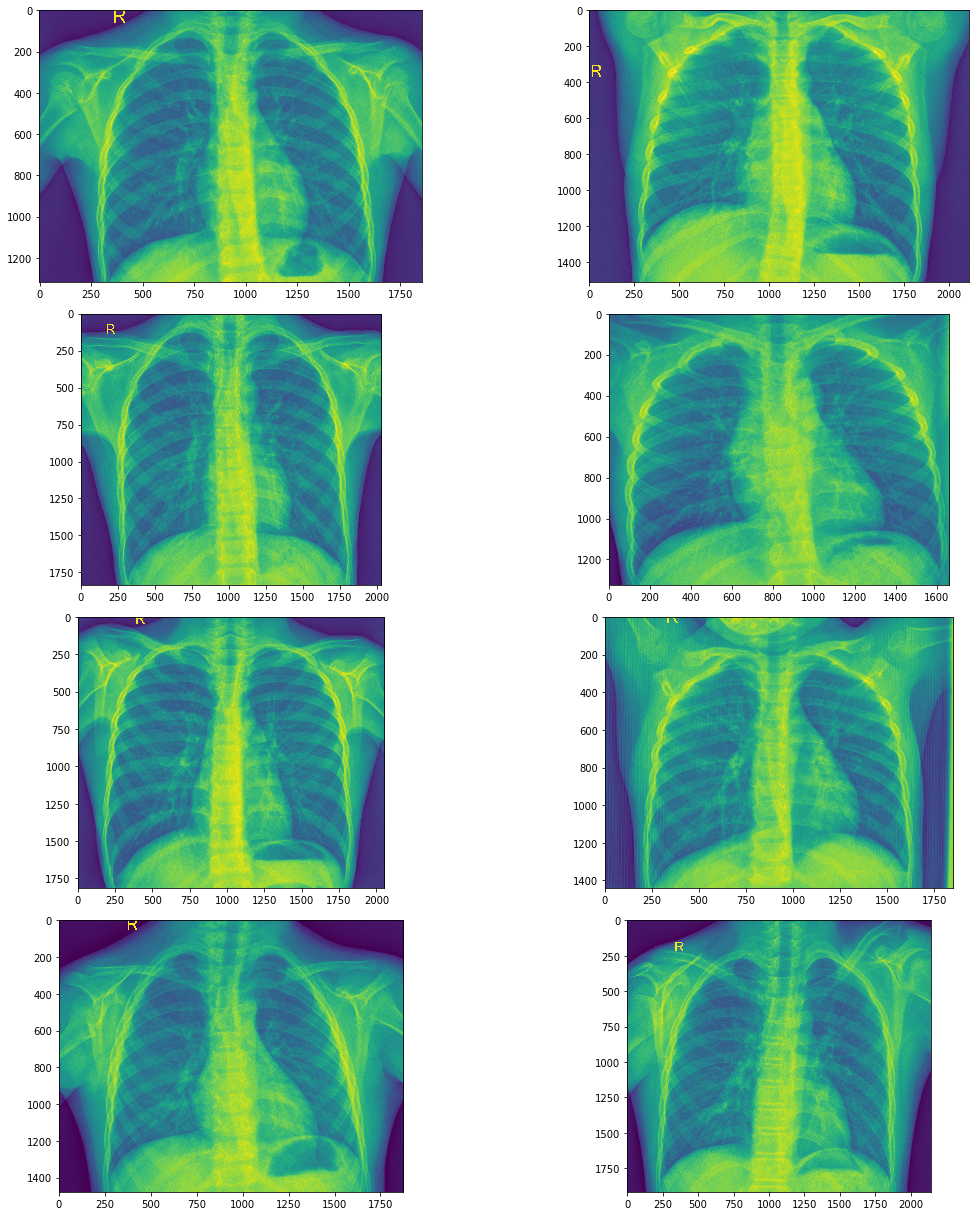

In [46]:
from PIL import Image
plt.figure(figsize = (17,17))
for iterator, filename in enumerate(sample_train_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image)

plt.tight_layout()

#### View images from Test

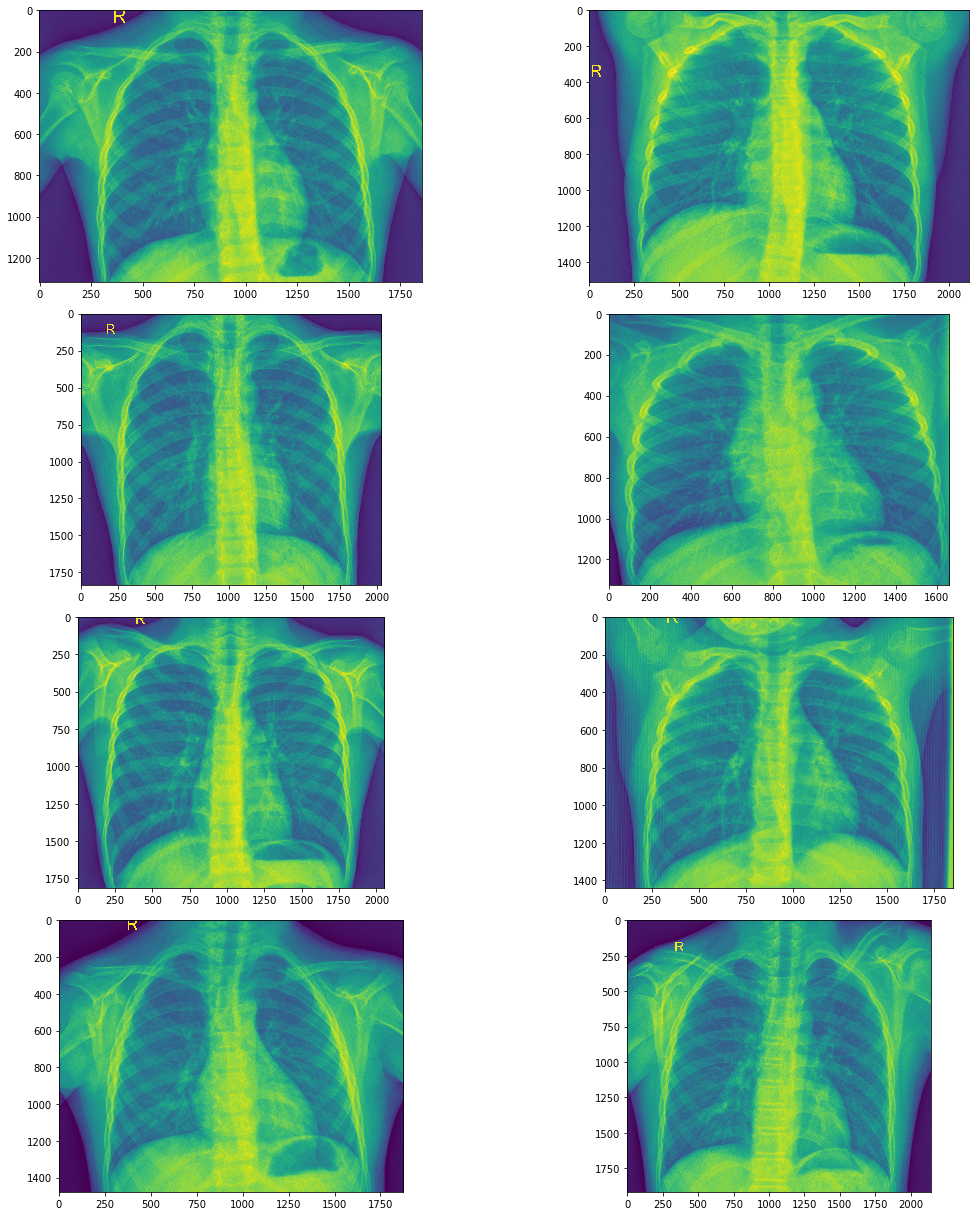

In [48]:
plt.figure(figsize = (17,17))
for iterator, filename in enumerate(sample_test_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image)

plt.tight_layout()


## Use of proper training and test set

In [8]:
# Drop all unwanted columns
# covid19 = covid19.drop('Episode Date',axis = 1)
# covid19 = covid19.drop('Reported Date',axis = 1)

# Create empty data frame
covid19_updated = pd.DataFrame()

# Apply Label Binarizer
lb = LabelBinarizer()
covid19['Outbreak Associated']= lb.fit_transform(covid19['Outbreak Associated']) 
covid19_updated = pd.concat([covid19_updated, covid19['Outbreak Associated']], axis=1)


dummies1 = pd.get_dummies(covid19["Age Group"], prefix='Age_Group')
covid19_updated = pd.concat([covid19_updated, dummies1], axis=1)

dummies2 = pd.get_dummies(covid19["Neighbourhood Name"], prefix='Neighbourhood_Name')
covid19_updated = pd.concat([covid19_updated, dummies2], axis=1)

fsa_dummies = pd.get_dummies(covid19.FSA, prefix='FSA')
covid19_updated = pd.concat([covid19_updated, fsa_dummies], axis=1)

dummies3 = pd.get_dummies(covid19["Source of Infection"], prefix='Source_of_Infection')
covid19_updated = pd.concat([covid19_updated, dummies3], axis=1)

covid19['Classification']= lb.fit_transform(covid19['Classification']) 
covid19_updated = pd.concat([covid19_updated, covid19['Classification']], axis=1)

dummies4 = pd.get_dummies(covid19["Client Gender"], prefix='Client_Gender')
covid19_updated = pd.concat([covid19_updated, dummies4], axis=1)

covid19['Currently Hospitalized']= lb.fit_transform(covid19['Currently Hospitalized']) 
covid19_updated = pd.concat([covid19_updated, covid19['Currently Hospitalized']], axis=1)

covid19['Currently in ICU']= lb.fit_transform(covid19['Currently in ICU']) 
covid19_updated = pd.concat([covid19_updated, covid19['Currently in ICU']], axis=1)

covid19['Currently Intubated']= lb.fit_transform(covid19['Currently Intubated']) 
covid19_updated = pd.concat([covid19_updated, covid19['Currently Intubated']], axis=1)

covid19['Ever Hospitalized']= lb.fit_transform(covid19['Ever Hospitalized']) 
covid19_updated = pd.concat([covid19_updated, covid19['Ever Hospitalized']], axis=1)

covid19['Ever in ICU']= lb.fit_transform(covid19['Ever in ICU']) 
covid19_updated = pd.concat([covid19_updated, covid19['Ever in ICU']], axis=1)

covid19['Ever Intubated']= lb.fit_transform(covid19['Ever Intubated']) 
covid19_updated = pd.concat([covid19_updated, covid19['Ever Intubated']], axis=1)

covid19_updated = pd.concat([covid19_updated, covid19['Outcome']], axis=1)

covid19_updated.Outcome = pd.factorize(covid19_updated.Outcome)[0]
covid19_updated.head()

# covid19_updated.to_csv("drive/My Drive/Final_Project/out.csv")

Outbreak Associated  Age_Group_19 and younger  Age_Group_20-29  \
0                    1                         0                0   
1                    1                         0                1   
2                    1                         0                0   
3                    0                         0                0   
4                    1                         0                0   

   Age_Group_30-39  Age_Group_40-49  Age_Group_50-59  Age_Group_60-69  \
0                0                0                1                0   
1                0                0                0                0   
2                0                0                0                1   
3                0                0                1                0   
4                1                0                0                0   

   Age_Group_70-79  Age_Group_80-89  Age_Group_90+  ...  Client_Gender_OTHER  \
0                0                0              0  ...                    0   
1                0                0              0  ...                    0   
2                0                0              0  ...                    0   
3                0                0              0  ...                    0   
4                0                0              0  ...                    0   

   Client_Gender_TRANSGENDER  Client_Gender_UNKNOWN  Currently Hospitalized  \
0                          0                      0                       0   
1                          0                      0                       0   
2                          0                      0                       0   
3                          0                      0                       0   
4                          0                      0                       0   

   Currently in ICU  Currently Intubated  Ever Hospitalized  Ever in ICU  \
0                 0                    0                  0            0   
1                 0                    0                  1            0   
2                 0                    0                  1            1   
3                 0                    0                  0            0   
4                 0                    0                  0            0   

   Ever Intubated  Outcome  
0               0        0  
1               0        0  
2               1        0  
3               0        0  
4               0        0  

[5 rows x 267 columns]

In [9]:
dataset = covid19_updated.values

X = dataset[:,0:261]
Y = dataset[:,261]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(10283, 261) (2204, 261) (2204, 261) (10283,) (2204,) (2204,)


In [10]:
model = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(261,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
hist_out = model.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
185/322 [================>.............] - ETA: 0s - loss: 0.0056 - accuracy: 1.00 - ETA: 29s - loss: 0.0056 - accuracy: 1.000 - ETA: 36s - loss: 0.0055 - accuracy: 1.000 - ETA: 1:00 - loss: 0.0055 - accuracy: 1.00 - ETA: 1:02 - loss: 0.0408 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0349 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0561 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0499 - accuracy: 0.99 - ETA: 58s - loss: 0.0453 - accuracy: 0.9931 - ETA: 58s - loss: 0.0416 - accuracy: 0.993 - ETA: 1:01 - loss: 0.0385 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0360 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0338 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0433 - accuracy: 0.99 - ETA: 59s - loss: 0.0514 - accuracy: 0.9917 - ETA: 59s - loss: 0.0488 - accuracy: 0.992 - ETA: 59s - loss: 0.0554 - accuracy: 0.990 - ETA: 1:01 - loss: 0.0529 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0508 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0489 - accuracy: 0.99 - ETA: 59s - loss: 0.0473 - accuracy: 0.9926 - ETA: 59s - loss: 0.05

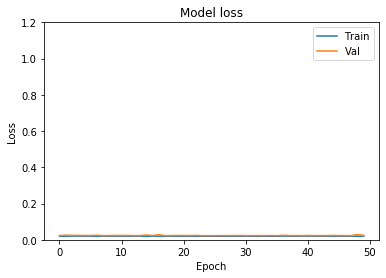

In [14]:
plt.plot(hist_out.history['loss'])
plt.plot(hist_out.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

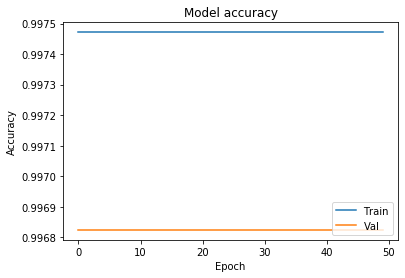

In [15]:
plt.plot(hist_out.history['accuracy'])
plt.plot(hist_out.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [58]:
ftd = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]


# Create a target attribute where value = positive if 'Pnemonia + COVID-19' or value = negative if 'Normal'
ftd['target'] = ['negative' if holder == 'Normal' else 'positive' for holder in ftd['Label']]

ftd= shuffle(ftd, random_state=1)

final_validation_data = ftd.iloc[1000:, :]
ftd = ftd.iloc[:1000, :]

print(f"Final train data shape : {ftd.shape}")
ftd.sample(10)

C:\Users\Micky\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Final train data shape : (1000, 7)


Unnamed: 0           X_ray_image_name   Label Dataset_type  \
719          719  NORMAL2-IM-0564-0001.jpeg  Normal        TRAIN   
164          164          IM-0349-0001.jpeg  Normal        TRAIN   
561          561          IM-0722-0001.jpeg  Normal        TRAIN   
169          169          IM-0343-0001.jpeg  Normal        TRAIN   
1170        1170  NORMAL2-IM-1149-0001.jpeg  Normal        TRAIN   
558          558          IM-0728-0001.jpeg  Normal        TRAIN   
611          611          IM-0752-0001.jpeg  Normal        TRAIN   
256          256          IM-0467-0001.jpeg  Normal        TRAIN   
1286        1286  NORMAL2-IM-1311-0001.jpeg  Normal        TRAIN   
1102        1102  NORMAL2-IM-1064-0001.jpeg  Normal        TRAIN   

     Label_2_Virus_category Label_1_Virus_category    target  
719                     NaN                    NaN  negative  
164                     NaN                    NaN  negative  
561                     NaN                    NaN  negative  
169                     NaN                    NaN  negative  
1170                    NaN                    NaN  negative  
558                     NaN                    NaN  negative  
611                     NaN                    NaN  negative  
256                     NaN                    NaN  negative  
1286                    NaN                    NaN  negative  
1102                    NaN                    NaN  negative

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [14]:
hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/40
293/293 [==============================] - 4s 14ms/step - loss: 0.6097 - accuracy: 0.7254 - val_loss: 0.5900 - val_accuracy: 0.7338
Epoch 2/40
293/293 [==============================] - 4s 13ms/step - loss: 0.5076 - accuracy: 0.7423 - val_loss: 0.3554 - val_accuracy: 0.8626
Epoch 3/40
293/293 [==============================] - 4s 14ms/step - loss: 0.4049 - accuracy: 0.8211 - val_loss: 0.3092 - val_accuracy: 0.8805
Epoch 4/40
293/293 [==============================] - 4s 13ms/step - loss: 0.3763 - accuracy: 0.8382 - val_loss: 0.2746 - val_accuracy: 0.8891
Epoch 5/40
293/293 [==============================] - 4s 13ms/step - loss: 0.3520 - accuracy: 0.8574 - val_loss: 0.2899 - val_accuracy: 0.8933
Epoch 6/40
293/293 [==============================] - 4s 14ms/step - loss: 0.3311 - accuracy: 0.8561 - val_loss: 0.2526 - val_accuracy: 0.9061
Epoch 7/40
293/293 [==============================] - 4s 14ms/step - loss: 0.3344 - accuracy: 0.8664 - val_loss: 0.2569 - val_accuracy: 0.9044

In [ ]:
hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

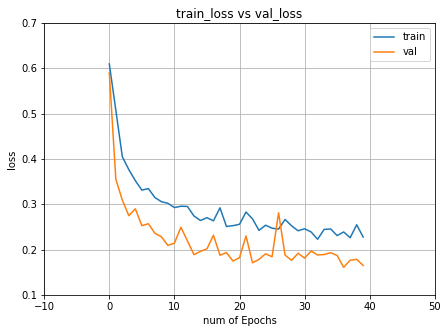

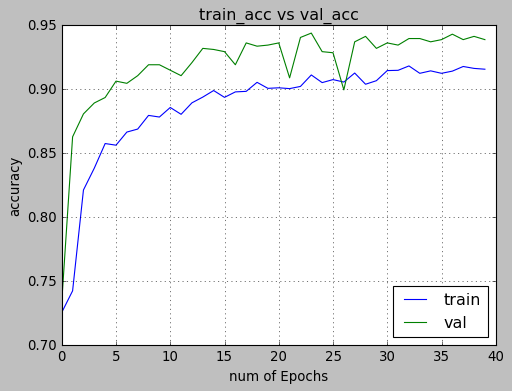

In [15]:
display_loss_accuracy(hist)

#### Effective Net80 Training and testing

In [11]:
image_input = Input(shape=(224, 224, 3))
model = EfficientNetB0(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [12]:
for layer in custom_resnet_model.layers[:-1]:
    layer.trainable = False

custom_resnet_model.layers[-1].trainable

True

In [13]:
custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
t=time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=32, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Epoch 1/100
147/147 [==============================] - 10s 67ms/step - loss: 0.2773 - accuracy: 0.8845 - val_loss: 0.1604 - val_accuracy: 0.9403
Epoch 2/100
147/147 [==============================] - 8s 56ms/step - loss: 0.1834 - accuracy: 0.9313 - val_loss: 0.1341 - val_accuracy: 0.9497
Epoch 3/100
147/147 [==============================] - 8s 57ms/step - loss: 0.1541 - accuracy: 0.9443 - val_loss: 0.1338 - val_accuracy: 0.9514
Epoch 4/100
147/147 [==============================] - 8s 57ms/step - loss: 0.1407 - accuracy: 0.9498 - val_loss: 0.1146 - val_accuracy: 0.9548
Epoch 5/100
147/147 [==============================] - 8s 57ms/step - loss: 0.1303 - accuracy: 0.9522 - val_loss: 0.1142 - val_accuracy: 0.9590
Epoch 6/100
147/147 [==============================] - 8s 57ms/step - loss: 0.1272 - accuracy: 0.9537 - val_loss: 0.1158 - val_accuracy: 0.9608
Epoch 7/100
147/147 [==============================] - 8s 57ms/step - loss: 0.1209 - accuracy: 0.9573 - val_loss: 0.1075 - val_accuracy

In [15]:
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

118/118 [==============================] - 3s 22ms/step - loss: 0.0901 - accuracy: 0.9693
[INFO] loss=0.0901, accuracy: 96.9283%


visualizing losses and accuracy 

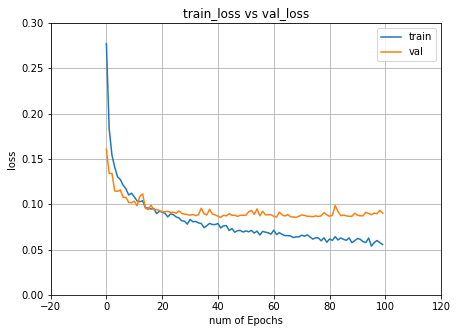

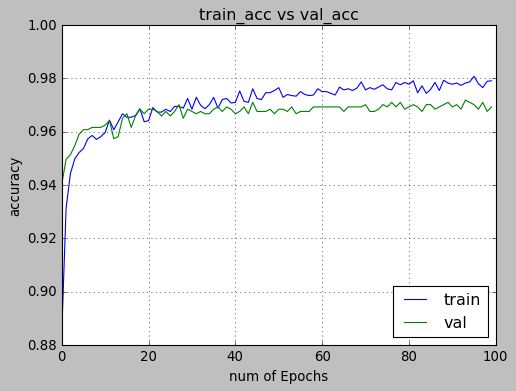

In [16]:
display_loss_accuracy(hist)

##### Mobile Netv2

In [11]:
image_input = Input(shape=(224, 224, 3))
model = MobileNetV2(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
output_layer = model(image_input)

# last_layer = model.get_layer('avg_pool').output
x= Flatten(name='flatten')(output_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

14540800/14536120 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________

In [12]:
for layer in custom_resnet_model.layers[:-1]:
    layer.trainable = False

custom_resnet_model.layers[-1].trainable

True

In [13]:
custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
t = time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=32, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Epoch 1/100
147/147 [==============================] - 7s 48ms/step - loss: 0.6437 - accuracy: 0.7252 - val_loss: 0.6028 - val_accuracy: 0.7338
Epoch 2/100
147/147 [==============================] - 6s 41ms/step - loss: 0.5841 - accuracy: 0.7289 - val_loss: 0.5623 - val_accuracy: 0.7338
Epoch 3/100
147/147 [==============================] - 6s 41ms/step - loss: 0.5552 - accuracy: 0.7289 - val_loss: 0.5391 - val_accuracy: 0.7338
Epoch 4/100
147/147 [==============================] - 6s 41ms/step - loss: 0.5367 - accuracy: 0.7293 - val_loss: 0.5222 - val_accuracy: 0.7338
Epoch 5/100
147/147 [==============================] - 6s 41ms/step - loss: 0.5217 - accuracy: 0.7312 - val_loss: 0.5073 - val_accuracy: 0.7398
Epoch 6/100
147/147 [==============================] - 6s 41ms/step - loss: 0.5084 - accuracy: 0.7340 - val_loss: 0.4940 - val_accuracy: 0.7406
Epoch 7/100
147/147 [==============================] - 6s 41ms/step - loss: 0.4961 - accuracy: 0.7376 - val_loss: 0.4815 - val_accuracy:

In [15]:
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

118/118 [==============================] - 2s 15ms/step - loss: 0.2416 - accuracy: 0.9147
[INFO] loss=0.2416, accuracy: 91.4676%


visualizing losses and accuracy 

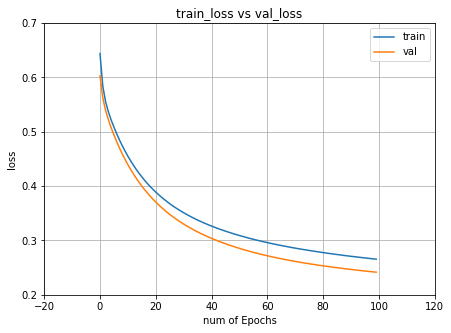

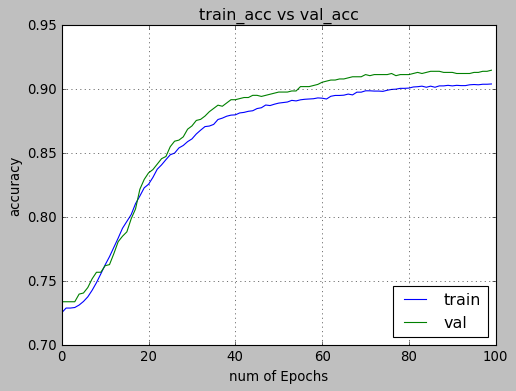

In [16]:
display_loss_accuracy(hist)

#### Resnet50

In [11]:
image_input = Input(shape=(224, 224, 3))
model = ResNet50(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [12]:
for layer in custom_resnet_model.layers[:-1]:
    layer.trainable = False

custom_resnet_model.layers[-1].trainable

True

In [13]:
custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
t=time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=32, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Epoch 1/100
147/147 [==============================] - 11s 73ms/step - loss: 0.2067 - accuracy: 0.9142 - val_loss: 0.1091 - val_accuracy: 0.9616
Epoch 2/100
147/147 [==============================] - 10s 65ms/step - loss: 0.1197 - accuracy: 0.9554 - val_loss: 0.0955 - val_accuracy: 0.9676
Epoch 3/100
147/147 [==============================] - 10s 65ms/step - loss: 0.0949 - accuracy: 0.9661 - val_loss: 0.1064 - val_accuracy: 0.9582
Epoch 4/100
147/147 [==============================] - 10s 65ms/step - loss: 0.0924 - accuracy: 0.9654 - val_loss: 0.0828 - val_accuracy: 0.9718
Epoch 5/100
147/147 [==============================] - 10s 65ms/step - loss: 0.0836 - accuracy: 0.9686 - val_loss: 0.0833 - val_accuracy: 0.9753
Epoch 6/100
147/147 [==============================] - 10s 65ms/step - loss: 0.0743 - accuracy: 0.9733 - val_loss: 0.0775 - val_accuracy: 0.9761
Epoch 7/100
147/147 [==============================] - 10s 65ms/step - loss: 0.0727 - accuracy: 0.9757 - val_loss: 0.0867 - val_ac

In [15]:
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

118/118 [==============================] - 3s 23ms/step - loss: 0.1323 - accuracy: 0.9744
[INFO] loss=0.1323, accuracy: 97.4403%


visualizing losses and accuracy 

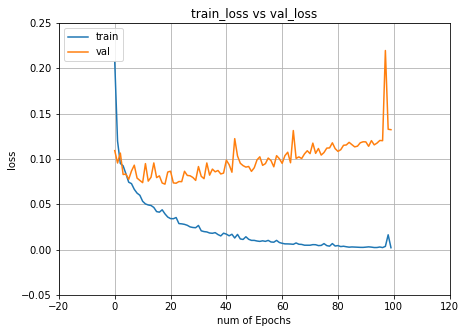

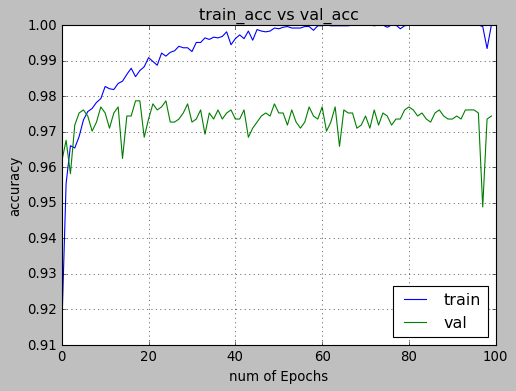

In [16]:
display_loss_accuracy(hist)

## Selection of appropriate layers

In [50]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2,
    shear_range=0.2,
    zoom_range=0.2,
)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe=ftd,
    directory=train_img_dir,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=16,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_validation_data,
    directory=train_img_dir,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=16,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


## Measurement  of models performance 

### Convolutional Neural Network

In [56]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape= (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Dropout(0.5))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)       

In [18]:
test_image_path = 'C:/UOFT/3546_TermProject/covid/DL-final-project/Chest_xray_seperate/PNEUMONIA/person11_bacteria_45.jpeg'
test_image = cv2.imread(test_image_path)
if ( num_channel == 1):
    test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
test_image_nd = np.expand_dims(test_image, axis=0) 
print (test_image_nd.shape)
print (test_image.shape)
# if num_channel==1:
#     if (K.image_data_format() == 'channels_first'):
#         test_image= np.expand_dims(test_image, axis=0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=3) 
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
# else:
#     if (K.image_data_format() == 'channels_first'):
#         test_image=np.rollaxis(test_image,2,0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
        
        
# Predicting the test image
print((model.predict(test_image_nd)))
print(model.predict_classes(test_image_nd))



(128, 128, 3)
(1, 128, 128, 3)
(128, 128, 3)
[[0.08644115 0.91355884]]
[1]


In [18]:
test_image_path = 'C:/UOFT/3546_TermProject/covid/DL-final-project/Chest_xray_seperate/PNEUMONIA/person11_bacteria_45.jpeg'
test_image = cv2.imread(test_image_path)
if ( num_channel == 1):
    test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
test_image_nd = np.expand_dims(test_image, axis=0) 
print (test_image_nd.shape)
print (test_image.shape)
# if num_channel==1:
#     if (K.image_data_format() == 'channels_first'):
#         test_image= np.expand_dims(test_image, axis=0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=3) 
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
# else:
#     if (K.image_data_format() == 'channels_first'):
#         test_image=np.rollaxis(test_image,2,0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
        
        
# Predicting the test image
print((model.predict(test_image_nd)))
print(model.predict_classes(test_image_nd))



(128, 128, 3)
(1, 128, 128, 3)
(128, 128, 3)
[[0.08644115 0.91355884]]
[1]


In [18]:
test_image_path = 'C:/UOFT/3546_TermProject/covid/DL-final-project/Chest_xray_seperate/PNEUMONIA/person11_bacteria_45.jpeg'
test_image = cv2.imread(test_image_path)
if ( num_channel == 1):
    test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
test_image_nd = np.expand_dims(test_image, axis=0) 
print (test_image_nd.shape)
print (test_image.shape)
# if num_channel==1:
#     if (K.image_data_format() == 'channels_first'):
#         test_image= np.expand_dims(test_image, axis=0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=3) 
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
# else:
#     if (K.image_data_format() == 'channels_first'):
#         test_image=np.rollaxis(test_image,2,0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
        
        
# Predicting the test image
print((model.predict(test_image_nd)))
print(model.predict_classes(test_image_nd))



(128, 128, 3)
(1, 128, 128, 3)
(128, 128, 3)
[[0.08644115 0.91355884]]
[1]


### efficient Net80 model

In [17]:
score = custom_resnet_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

Test Loss: 0.09007590264081955
Test accuracy: 0.9692832827568054
(1, 224, 224, 3)
[[1.14373943e-05 1.04924751e-04 2.51722900e-04 4.77186404e-04
  1.18551354e-04 2.09018617e-05 4.94372798e-05 3.72421637e-05
  2.81130688e-05 3.33237003e-05 5.39718130e-05 4.48332175e-05
  1.52935299e-05 2.69304637e-05 9.17184298e-06 1.39459144e-05
  3.57407189e-05 1.11406243e-05 9.04056869e-05 1.29782620e-05
  4.97367182e-05 1.52026812e-04 1.29650245e-04 9.28172449e-05
  5.12071965e-05 1.26058385e-05 2.34643376e-05 2.12379255e-05
  1.80296520e-05 4.98396868e-04 2.47400421e-05 6.25148459e-05
  1.78604005e-05 5.69082549e-05 7.87051613e-05 7.06591309e-05
  2.68311251e-05 3.09490679e-05 3.14168792e-05 2.49381701e-05
  3.04195401e-05 1.12252492e-05 7.05893126e-06 9.69405119e-06
  2.52910850e-05 3.18797393e-05 5.48759344e-05 8.84422025e-06
  5.99929308e-06 3.62554201e-05 4.74188018e-05 2.52091377e-05
  1.06253538e-04 5.40399014e-05 7.13719346e-05 5.98135775e-05
  2.53936560e-05 3.17523663e-05 3.84590785e-05 1.8

AttributeError: 'Functional' object has no attribute 'predict_classes'

#### Confusion matrix

In [20]:
Y_pred = custom_resnet_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(Normal)', 'class 1(Pneumonia)']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[[6.5542844e-07 9.9999940e-01]
 [9.9147195e-01 8.5280919e-03]
 [1.9132092e-05 9.9998093e-01]
 ...
 [2.7467880e-07 9.9999976e-01]
 [8.9294559e-08 9.9999988e-01]
 [9.9940789e-01 5.9217890e-04]]
[1 0 1 ... 1 1 0]
                    precision    recall  f1-score   support

   class 0(Normal)       0.95      0.94      0.94       312
class 1(Pneumonia)       0.98      0.98      0.98       860

          accuracy                           0.97      1172
         macro avg       0.96      0.96      0.96      1172
      weighted avg       0.97      0.97      0.97      1172

[[293  19]
 [ 17 843]]


#### Inception V3 model

In [17]:
score = custom_resnet_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

Test Loss: 0.9426031112670898
Test accuracy: 0.9044368863105774
(1, 224, 224, 3)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.03167715e-37 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.74047309e-38 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00

AttributeError: 'Functional' object has no attribute 'predict_classes'

Testing a new image

In [18]:
test_image_path = 'D:/Harold/MyDNN/DataSet/Chest_xray_seperate/PNEUMONIA/person11_bacteria_45.jpeg'
test_image = image.load_img(test_image_path, target_size=(224, 224))
x = image.img_to_array(test_image)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print (x.shape)    

            
# if num_channel==1:
#     if (K.image_data_format() == 'channels_first'):
#         test_image= np.expand_dims(test_image, axis=0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=3) 
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
# else:
#     if (K.image_data_format() == 'channels_first'):
#         test_image=np.rollaxis(test_image,2,0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
        
        
# Predicting the test image
yhat = custom_resnet_model.predict(x)
print(yhat)
# print(custom_resnet_model.predict_classes(x))
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

(1, 224, 224, 3)
[[7.9543006e-20 1.0000000e+00]]


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 2)

In [20]:
Y_pred = custom_resnet_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(Normal)', 'class 1(Pneumonia)']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[[2.1685484e-10 1.0000000e+00]
 [9.9941623e-01 5.8379851e-04]
 [2.1206019e-14 1.0000000e+00]
 ...
 [3.4830153e-22 1.0000000e+00]
 [1.7426691e-19 1.0000000e+00]
 [8.4951813e-07 9.9999917e-01]]
[1 0 1 ... 1 1 1]
                    precision    recall  f1-score   support

   class 0(Normal)       0.93      0.70      0.79       312
class 1(Pneumonia)       0.90      0.98      0.94       860

          accuracy                           0.90      1172
         macro avg       0.91      0.84      0.87      1172
      weighted avg       0.91      0.90      0.90      1172

[[217  95]
 [ 17 843]]


Compute confusion matrix

Confusion matrix, without normalization
[[217  95]
 [ 17 843]]


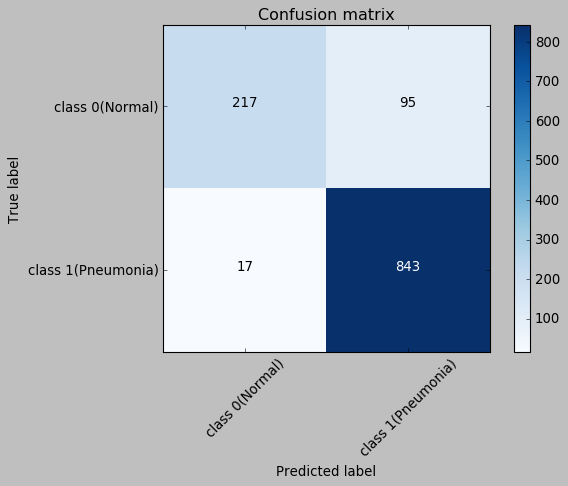

In [21]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

#### Mobile NetV2 Model

In [17]:
score = custom_resnet_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

Test Loss: 0.24162615835666656
Test accuracy: 0.914675772190094
(1, 224, 224, 3)
[[8.33914601e-05 9.43122213e-05 6.17418555e-05 6.54168252e-05
  1.13233073e-04 4.74682347e-05 5.82300017e-05 1.08953674e-04
  2.47885200e-05 1.91886254e-04 7.08437146e-05 3.57683566e-05
  2.95793929e-04 5.55347469e-05 2.16536369e-04 6.21841609e-05
  3.03070352e-04 4.57870956e-05 1.19120559e-04 8.90225492e-05
  1.66406928e-04 9.70872716e-05 1.62744705e-04 1.49278203e-04
  7.53177155e-05 1.09933528e-04 2.17667766e-04 1.03260376e-04
  1.68310271e-05 4.71250714e-05 2.25656520e-04 1.11117632e-04
  1.19079450e-04 3.50336049e-05 7.37054288e-05 1.12858543e-04
  1.31092936e-04 5.13734412e-05 1.09661698e-04 1.33358277e-04
  1.32257570e-04 3.87834370e-05 6.33041956e-04 8.69823198e-05
  1.75937254e-04 4.36656082e-05 3.17085214e-04 4.07961088e-05
  3.52774805e-05 9.89007895e-05 3.13197001e-04 3.97188778e-05
  3.01094784e-04 2.42384500e-04 3.31761781e-04 3.03487395e-05
  3.10513788e-05 1.01327387e-04 8.12207290e-04 2.79

AttributeError: 'Functional' object has no attribute 'predict_classes'

Testing a new image

In [18]:
test_image_path = 'D:/Harold/MyDNN/DataSet/Chest_xray_seperate/PNEUMONIA/person11_bacteria_45.jpeg'
test_image = image.load_img(test_image_path, target_size=(224, 224))
x = image.img_to_array(test_image)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print (x.shape)    

            
# if num_channel==1:
#     if (K.image_data_format() == 'channels_first'):
#         test_image= np.expand_dims(test_image, axis=0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=3) 
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
# else:
#     if (K.image_data_format() == 'channels_first'):
#         test_image=np.rollaxis(test_image,2,0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
        
        
# Predicting the test image
yhat = custom_resnet_model.predict(x)
print(yhat)
# print(custom_resnet_model.predict_classes(x))
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

(1, 224, 224, 3)
[[0.04744451 0.95255554]]


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 2)

#### renet50

In [17]:
score = custom_resnet_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

Test Loss: 0.13225294649600983
Test accuracy: 0.9744027256965637
(1, 224, 224, 3)
[[4.82067890e-07 2.68882036e-06 2.46438071e-06 1.46347942e-04
  1.14383847e-05 4.81724349e-08 2.50176436e-06 1.93318300e-07
  1.12078631e-07 1.33230387e-07 1.55274762e-07 4.57866662e-07
  8.66559446e-07 2.24399500e-07 6.64423965e-08 1.10845995e-07
  1.35442542e-06 5.03833007e-07 1.79790817e-07 6.47744287e-07
  3.05023384e-08 9.56223190e-08 1.10445868e-07 1.10137853e-06
  7.54676677e-08 4.63201928e-07 2.87497016e-07 7.07335062e-08
  5.35643494e-07 1.51549584e-05 2.59477027e-08 2.91564879e-06
  7.73133081e-07 4.95935637e-07 1.98538643e-07 2.52716568e-08
  1.83687155e-06 7.88459204e-07 3.27636599e-07 1.85687998e-06
  1.74747020e-05 5.42289399e-07 8.17253891e-08 6.31402060e-08
  3.37520163e-07 1.02205229e-06 7.63697062e-06 5.59314408e-08
  7.33921922e-07 4.65218932e-07 4.84302063e-06 6.55129497e-08
  2.73576143e-06 3.79595463e-06 7.06228604e-07 5.70710426e-06
  9.65091203e-07 2.63103260e-07 4.50051573e-07 6.2

AttributeError: 'Functional' object has no attribute 'predict_classes'

In [21]:
Y_pred = custom_resnet_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(Normal)', 'class 1(Pneumonia)']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[[9.9328565e-07 9.9999905e-01]
 [1.0000000e+00 6.4503549e-16]
 [1.3406505e-04 9.9986589e-01]
 ...
 [1.9769919e-10 1.0000000e+00]
 [7.7234494e-09 1.0000000e+00]
 [9.9999988e-01 9.0127173e-08]]
[1 0 1 ... 1 1 0]
                    precision    recall  f1-score   support

   class 0(Normal)       0.94      0.96      0.95       312
class 1(Pneumonia)       0.99      0.98      0.98       860

          accuracy                           0.97      1172
         macro avg       0.96      0.97      0.97      1172
      weighted avg       0.97      0.97      0.97      1172

[[301  11]
 [ 19 841]]


Compute confusion matrix

Confusion matrix, without normalization
[[301  11]
 [ 19 841]]


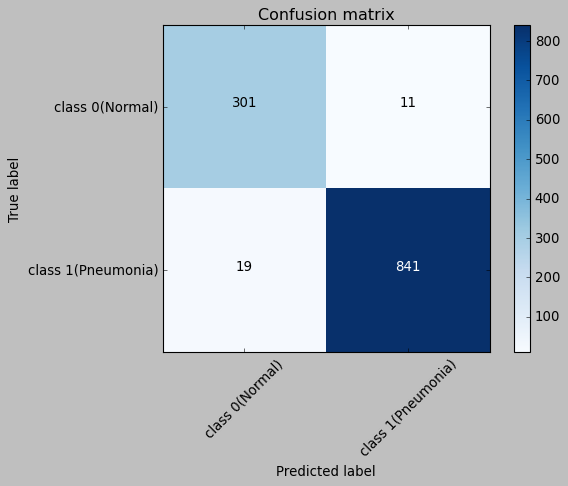

In [22]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

## regulization 

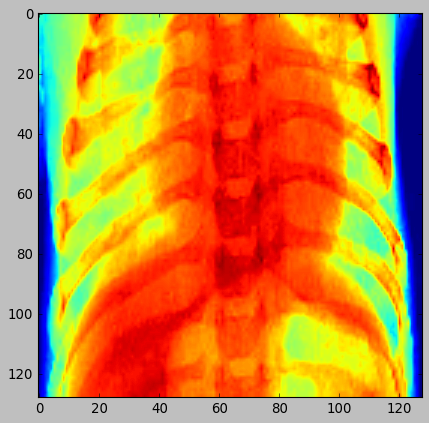

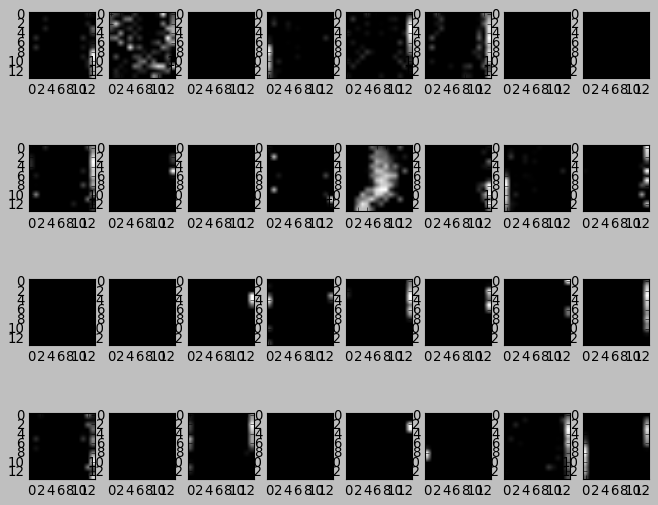

In [19]:
# def get_featuremaps(model, layer_idx, X_batch):
#     print(model.layers[0].input)
#     print(model.layers[layer_idx].output)
#     print(test_image.shape)
#     get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
# #     activations = get_activations([X_batch,0])
#     activations = 0
#     return activations

# layer_num=3
# filter_num=0
# # print(X_train[0])

# activations = get_featuremaps(model, int(layer_num),test_image)

# # print (np.shape(activations))
# # feature_maps = activations[0][0]      
# # print (np.shape(feature_maps))


# feature_maps = model.predict(test_image_nd)
# print(feature_maps.shape)
# square = 4
# index = 1
# for _ in range(square):
#     for _ in range(square):
#         ax = plt.subplot(square, square, index)
#         ax.set_xticks([])
#         ax.set_yticks([])
#         plt.imshow(feature_maps[0, index-1], cmap='viridis')
#         index += 1
# plt.show()

# model.summary()

# successive_feature_maps = model.predict(test_image_nd)

# layer_names = [layer.name for layer in model.layers]
# for layer_name, feature_map in zip(layer_names, successive_feature_maps):
#   print(feature_map.shape)
#   if len(feature_map.shape) == 4:
    
#     # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
#     n_features = feature_map.shape[-1]  # number of features in the feature map
#     size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
#     # We will tile our images in this matrix
#     display_grid = np.zeros((size, size * n_features))
    
#     # Postprocess the feature to be visually palatable
#     for i in range(n_features):
#       x  = feature_map[0, :, :, i]
#       x -= x.mean()
#       x /= x.std ()
#       x *=  64
#       x += 128
#       x  = np.clip(x, 0, 255).astype('uint8')
#       # Tile each filter into a horizontal grid
#       display_grid[:, i * size : (i + 1) * size] = x# Display the grid
#     scale = 20. / n_features
#     plt.figure( figsize=(scale * n_features, scale) )
#     plt.title ( layer_name )
#     plt.grid  ( False )
#     plt.imshow( display_grid, aspect='auto', cmap='viridis' )


from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,128,128,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
plt.imshow(test_image)
plt.imshow(X_train[10][:,:,0]);
display_activation(activations, 8, 4, 3)

### efficient Net80 model

In [18]:
test_image_path = 'D:/Harold/MyDNN/DataSet/Chest_xray_seperate/PNEUMONIA/person11_bacteria_45.jpeg'
test_image = image.load_img(test_image_path, target_size=(224, 224))
x = image.img_to_array(test_image)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print (x.shape)    

            
# if num_channel==1:
#     if (K.image_data_format() == 'channels_first'):
#         test_image= np.expand_dims(test_image, axis=0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=3) 
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
# else:
#     if (K.image_data_format() == 'channels_first'):
#         test_image=np.rollaxis(test_image,2,0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
        
        
# Predicting the test image
yhat = custom_resnet_model.predict(x)
print(yhat)
# print(custom_resnet_model.predict_classes(x))
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

(1, 224, 224, 3)
[[0.00159899 0.998401  ]]


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 2)

#### Visualizing the intermediate layer

(1, 2)


IndexError: invalid index to scalar variable.

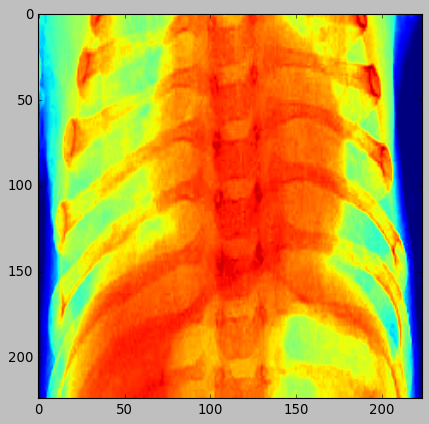

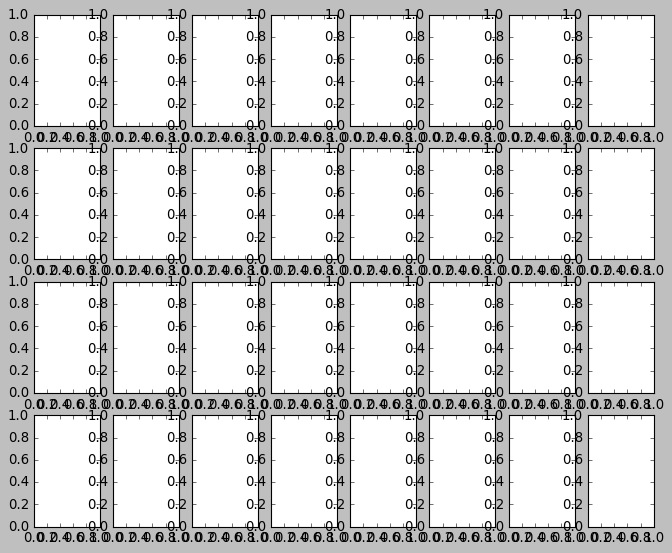

In [19]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=custom_resnet_model.input, outputs=layer_outputs)
activations = custom_resnet_model.predict(X_train[10].reshape(1,224,224,3))
print(activations.shape)
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[0, act_index]
    activation_index=1
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
plt.imshow(test_image)
plt.imshow(X_train[10][:,:,0]);
display_activation(activations, 8, 4, 1)

Inception V3 visualization

(1, 2)


IndexError: invalid index to scalar variable.

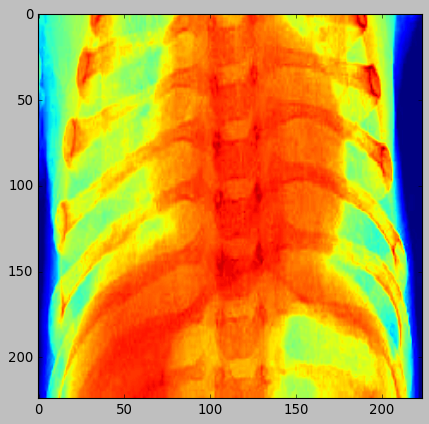

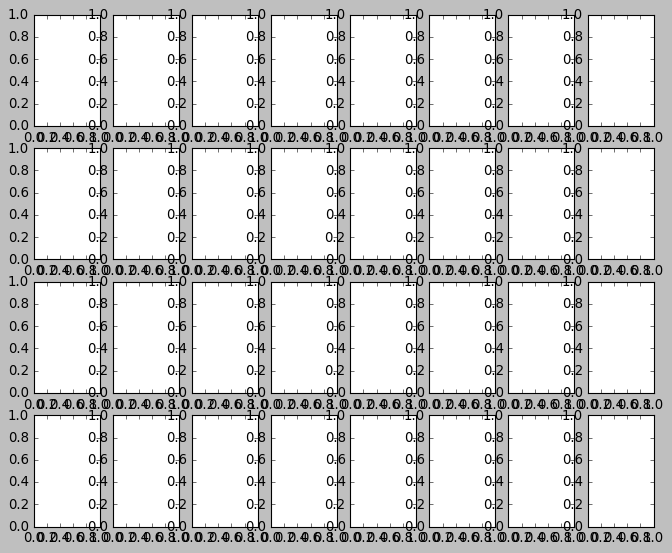

In [19]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=custom_resnet_model.input, outputs=layer_outputs)
activations = custom_resnet_model.predict(X_train[10].reshape(1,224,224,3))
print(activations.shape)
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[0, act_index]
    activation_index=1
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
plt.imshow(test_image)
plt.imshow(X_train[10][:,:,0]);
display_activation(activations, 8, 4, 1)

#### Mobile NetV2 

In [17]:
score = custom_resnet_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

Test Loss: 0.24162615835666656
Test accuracy: 0.914675772190094
(1, 224, 224, 3)
[[8.33914601e-05 9.43122213e-05 6.17418555e-05 6.54168252e-05
  1.13233073e-04 4.74682347e-05 5.82300017e-05 1.08953674e-04
  2.47885200e-05 1.91886254e-04 7.08437146e-05 3.57683566e-05
  2.95793929e-04 5.55347469e-05 2.16536369e-04 6.21841609e-05
  3.03070352e-04 4.57870956e-05 1.19120559e-04 8.90225492e-05
  1.66406928e-04 9.70872716e-05 1.62744705e-04 1.49278203e-04
  7.53177155e-05 1.09933528e-04 2.17667766e-04 1.03260376e-04
  1.68310271e-05 4.71250714e-05 2.25656520e-04 1.11117632e-04
  1.19079450e-04 3.50336049e-05 7.37054288e-05 1.12858543e-04
  1.31092936e-04 5.13734412e-05 1.09661698e-04 1.33358277e-04
  1.32257570e-04 3.87834370e-05 6.33041956e-04 8.69823198e-05
  1.75937254e-04 4.36656082e-05 3.17085214e-04 4.07961088e-05
  3.52774805e-05 9.89007895e-05 3.13197001e-04 3.97188778e-05
  3.01094784e-04 2.42384500e-04 3.31761781e-04 3.03487395e-05
  3.10513788e-05 1.01327387e-04 8.12207290e-04 2.79

AttributeError: 'Functional' object has no attribute 'predict_classes'

Testing a new image

In [18]:
test_image_path = 'D:/Harold/MyDNN/DataSet/Chest_xray_seperate/PNEUMONIA/person11_bacteria_45.jpeg'
test_image = image.load_img(test_image_path, target_size=(224, 224))
x = image.img_to_array(test_image)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print (x.shape)    

            
# if num_channel==1:
#     if (K.image_data_format() == 'channels_first'):
#         test_image= np.expand_dims(test_image, axis=0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=3) 
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
# else:
#     if (K.image_data_format() == 'channels_first'):
#         test_image=np.rollaxis(test_image,2,0)
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
#     else:
#         test_image= np.expand_dims(test_image, axis=0)
#         print (test_image.shape)
        
        
# Predicting the test image
yhat = custom_resnet_model.predict(x)
print(yhat)
# print(custom_resnet_model.predict_classes(x))
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

(1, 224, 224, 3)
[[0.04744451 0.95255554]]


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 2)

#### Resnet50

(1, 2)


IndexError: invalid index to scalar variable.

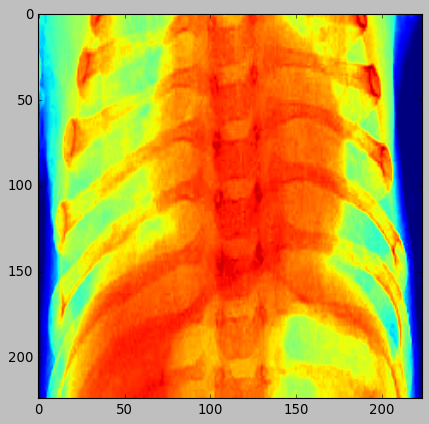

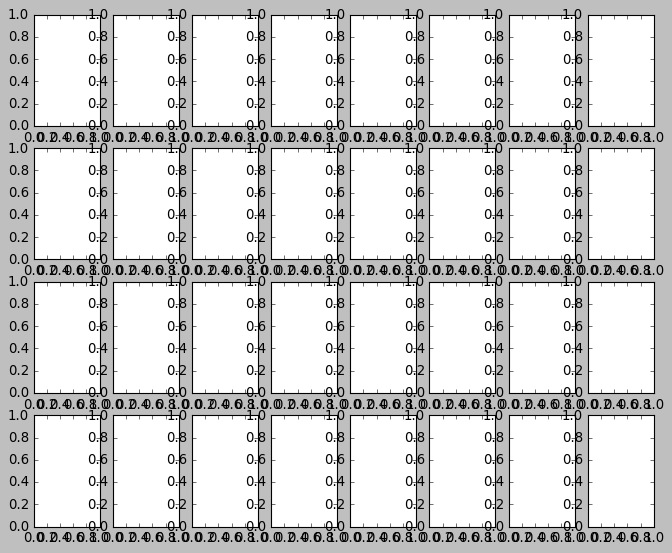

In [19]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=custom_resnet_model.input, outputs=layer_outputs)
activations = custom_resnet_model.predict(X_train[10].reshape(1,224,224,3))
print(activations.shape)
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[0, act_index]
    activation_index=1
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
plt.imshow(test_image)
plt.imshow(X_train[10][:,:,0]);
display_activation(activations, 8, 4, 1)

## Overall breadth and depth of commentary/ explanations 

In this report, we have conducted 5 models with are Resnet50, mobileNetV2, EfficientNet80, VGG19 and InceptionV3. We have also 2 classs 0 and 1 which is normal and Pneumonia. In the MobileNetV2 we see that in class 0, the precision is 0.88, recall is 0.73, f1-score is 0.83 and support is 312. In class 1, the precision is 0.93, recall is 0.96, f1-score is 0.94 and support is 860. In the VGG19 we see that in class 0, the precision is 0.89, recall is 0.85, f1-score is 0.87 and support is 312. In class 1, the precision is 0.95, recall is 0.96, f1-score is 0.95 and support is 860. In the Inception V3 we see that in class 0, the precision is 0.93, recall is 0.70, f1-score is 0.79 and support is 312. In class 1, the precision is 0.90, recall is 0.98, f1-score is 0.94 and support is 860. In the ResNet50 we see that in class 0, the precision is 0.94, recall is 0.96, f1-score is 0.95 and support is 312. In class 1, the precision is 0.99, recall is 0.98, f1-score is 0.98 and support is 860. In the EfficientNetB0 we see that in class 0, the precision is 0.95, recall is 0.94, f1-score is 0.94 and support is 312. In class 1, the precision is 0.98, recall is 0.98, f1-score is 0.98 and support is 860. Based on the f1-score, the best models used in the x-ray dataset is EfficientNetB0. 